In [137]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [139]:
# read csv into dataframe

injury_data_df = pd.read_csv("injury_data_updated.csv")
injury_data_df.head()

,Unnamed: 0,Season Year,Week,Team Name,Team City,Player,Player Jersey,Position,Injury Status,Injury Status Date,Practice Status,Injury Type
0,0,2023.0,1.0,Cowboys,Dallas,Jourdan Lewis,2.0,CB,NaN,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
1,1,2023.0,1.0,Cowboys,Dallas,Tyler Smith,73.0,OL,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Hamstring
2,2,2023.0,1.0,Cowboys,Dallas,Sam Williams,54.0,DE,Questionable,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
3,3,2023.0,1.0,Cowboys,Dallas,Donovan Wilson,6.0,SAF,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Calf
4,4,2023.0,1.0,Cowboys,Dallas,Malik Hooker,28.0,SAF,Questionable,2023-09-09T00:00:00+00:00,Did Not Participate In Practice,Illness


In [141]:
# get total unique injury count

injury_data_df['Injury Type'].nunique()

60

In [143]:
# see what 60 injuries are in the dataset

injury_data_df['Injury Type'].unique()

array(['Foot', 'Hamstring', 'Calf', 'Illness', 'Ankle', 'Chest',
       'Abdomen', 'NIR - Personal', 'Knee', 'Back', 'Quad', 'NIR - Rest',
       'Oblique', 'Shoulder', 'Elbow', 'Ribs', 'Groin', 'Heel', 'Wrist',
       'Toe', 'NIR-Rest', 'Hamsting', 'Neck', 'Forearm', 'Concussion',
       'Hand', 'Rest', 'Thigh', 'Shin', 'Hip', 'Personal', 'Pectoral',
       'NIR  -  Rest', 'Finger', 'Biceps', 'Thumb', 'Achilles', 'Eye',
       'Quadriceps', 'Quadricep', 'Bicep', 'Rib', 'Vet Rest', 'Face',
       'NIR', 'Other', 'Triceps', 'triceps', 'Achillies', 'Ankle/Foot',
       'ribs', 'Right Shoulder', 'Head', 'Glute', 'Ankle/Elbow',
       'Personal matter', 'Tooth', 'Not Injury Related', 'Tibia', 'Rest '],
      dtype=object)

In [145]:
# clean up data set removing non-injuries

injury_updated_df = injury_data_df.drop(injury_data_df[injury_data_df['Injury Type'].isin([
    'Illness',
    'NIR - Personal',
    'NIR - Rest',
    'NIR-Rest',
    'Rest',
    'Personal',
    'NIR  -  Rest',
    'Vet Rest',
    'NIR',
    'Personal matter',
    'Not Injury Related',
    'Rest '])].index)
injury_updated_df.head()

,Unnamed: 0,Season Year,Week,Team Name,Team City,Player,Player Jersey,Position,Injury Status,Injury Status Date,Practice Status,Injury Type
0,0,2023.0,1.0,Cowboys,Dallas,Jourdan Lewis,2.0,CB,NaN,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
1,1,2023.0,1.0,Cowboys,Dallas,Tyler Smith,73.0,OL,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Hamstring
2,2,2023.0,1.0,Cowboys,Dallas,Sam Williams,54.0,DE,Questionable,2023-09-08T00:00:00+00:00,Full Participation In Practice,Foot
3,3,2023.0,1.0,Cowboys,Dallas,Donovan Wilson,6.0,SAF,Doubtful,2023-09-08T00:00:00+00:00,Did Not Participate In Practice,Calf
5,5,2023.0,1.0,Cowboys,Dallas,Tyron Smith,77.0,T,Questionable,2023-09-08T00:00:00+00:00,Limited Participation In Practice,Ankle


In [147]:
# see updated count of injury types

injury_updated_df['Injury Type'].nunique()

48

In [149]:
# view in full to double check entries

injury_updated_df['Injury Type'].unique()

array(['Foot', 'Hamstring', 'Calf', 'Ankle', 'Chest', 'Abdomen', 'Knee',
       'Back', 'Quad', 'Oblique', 'Shoulder', 'Elbow', 'Ribs', 'Groin',
       'Heel', 'Wrist', 'Toe', 'Hamsting', 'Neck', 'Forearm',
       'Concussion', 'Hand', 'Thigh', 'Shin', 'Hip', 'Pectoral', 'Finger',
       'Biceps', 'Thumb', 'Achilles', 'Eye', 'Quadriceps', 'Quadricep',
       'Bicep', 'Rib', 'Face', 'Other', 'Triceps', 'triceps', 'Achillies',
       'Ankle/Foot', 'ribs', 'Right Shoulder', 'Head', 'Glute',
       'Ankle/Elbow', 'Tooth', 'Tibia'], dtype=object)

In [151]:
# generate count by injury type

injury_updated_df['Injury Type'].value_counts().head()

Injury Type
Knee          516
Ankle         423
Hamstring     366
Shoulder      234
Concussion    162
Name: count, dtype: int64

In [153]:
# clean data frame by fixing typos

injury_updated_df['Injury Type'] = injury_updated_df['Injury Type'].replace({
    'ribs': 'Rib',
    'Ribs': 'Rib',
    'Biceps': 'Bicep',
    'Quadricep': 'Quad',
    'Quadriceps': 'Quad',
    'Hamsting': 'Hamstring',
    'Achillies': 'Achilles',
    'Right Shoulder': 'Shoulder',
    'Triceps': 'Tricep',
    'triceps': 'Tricep',
    
})
injury_updated_df['Injury Type'].value_counts().head()

Injury Type
Knee          516
Ankle         423
Hamstring     367
Shoulder      235
Concussion    162
Name: count, dtype: int64

In [155]:
# get count updates 
injury_updated_df['Injury Type'].nunique()

39

In [157]:
# use groupby to get injury counts by injury type but ensuring no duplicate entries are counted

injury_counts_by_injury = injury_updated_df.groupby('Injury Type')['Player'].nunique()
injury_counts_by_injury = injury_counts_by_injury.reset_index(name='Count')

injury_counts_by_injury.head()

,Injury Type,Count
0,Abdomen,9
1,Achilles,9
2,Ankle,220
3,Ankle/Elbow,1
4,Ankle/Foot,1


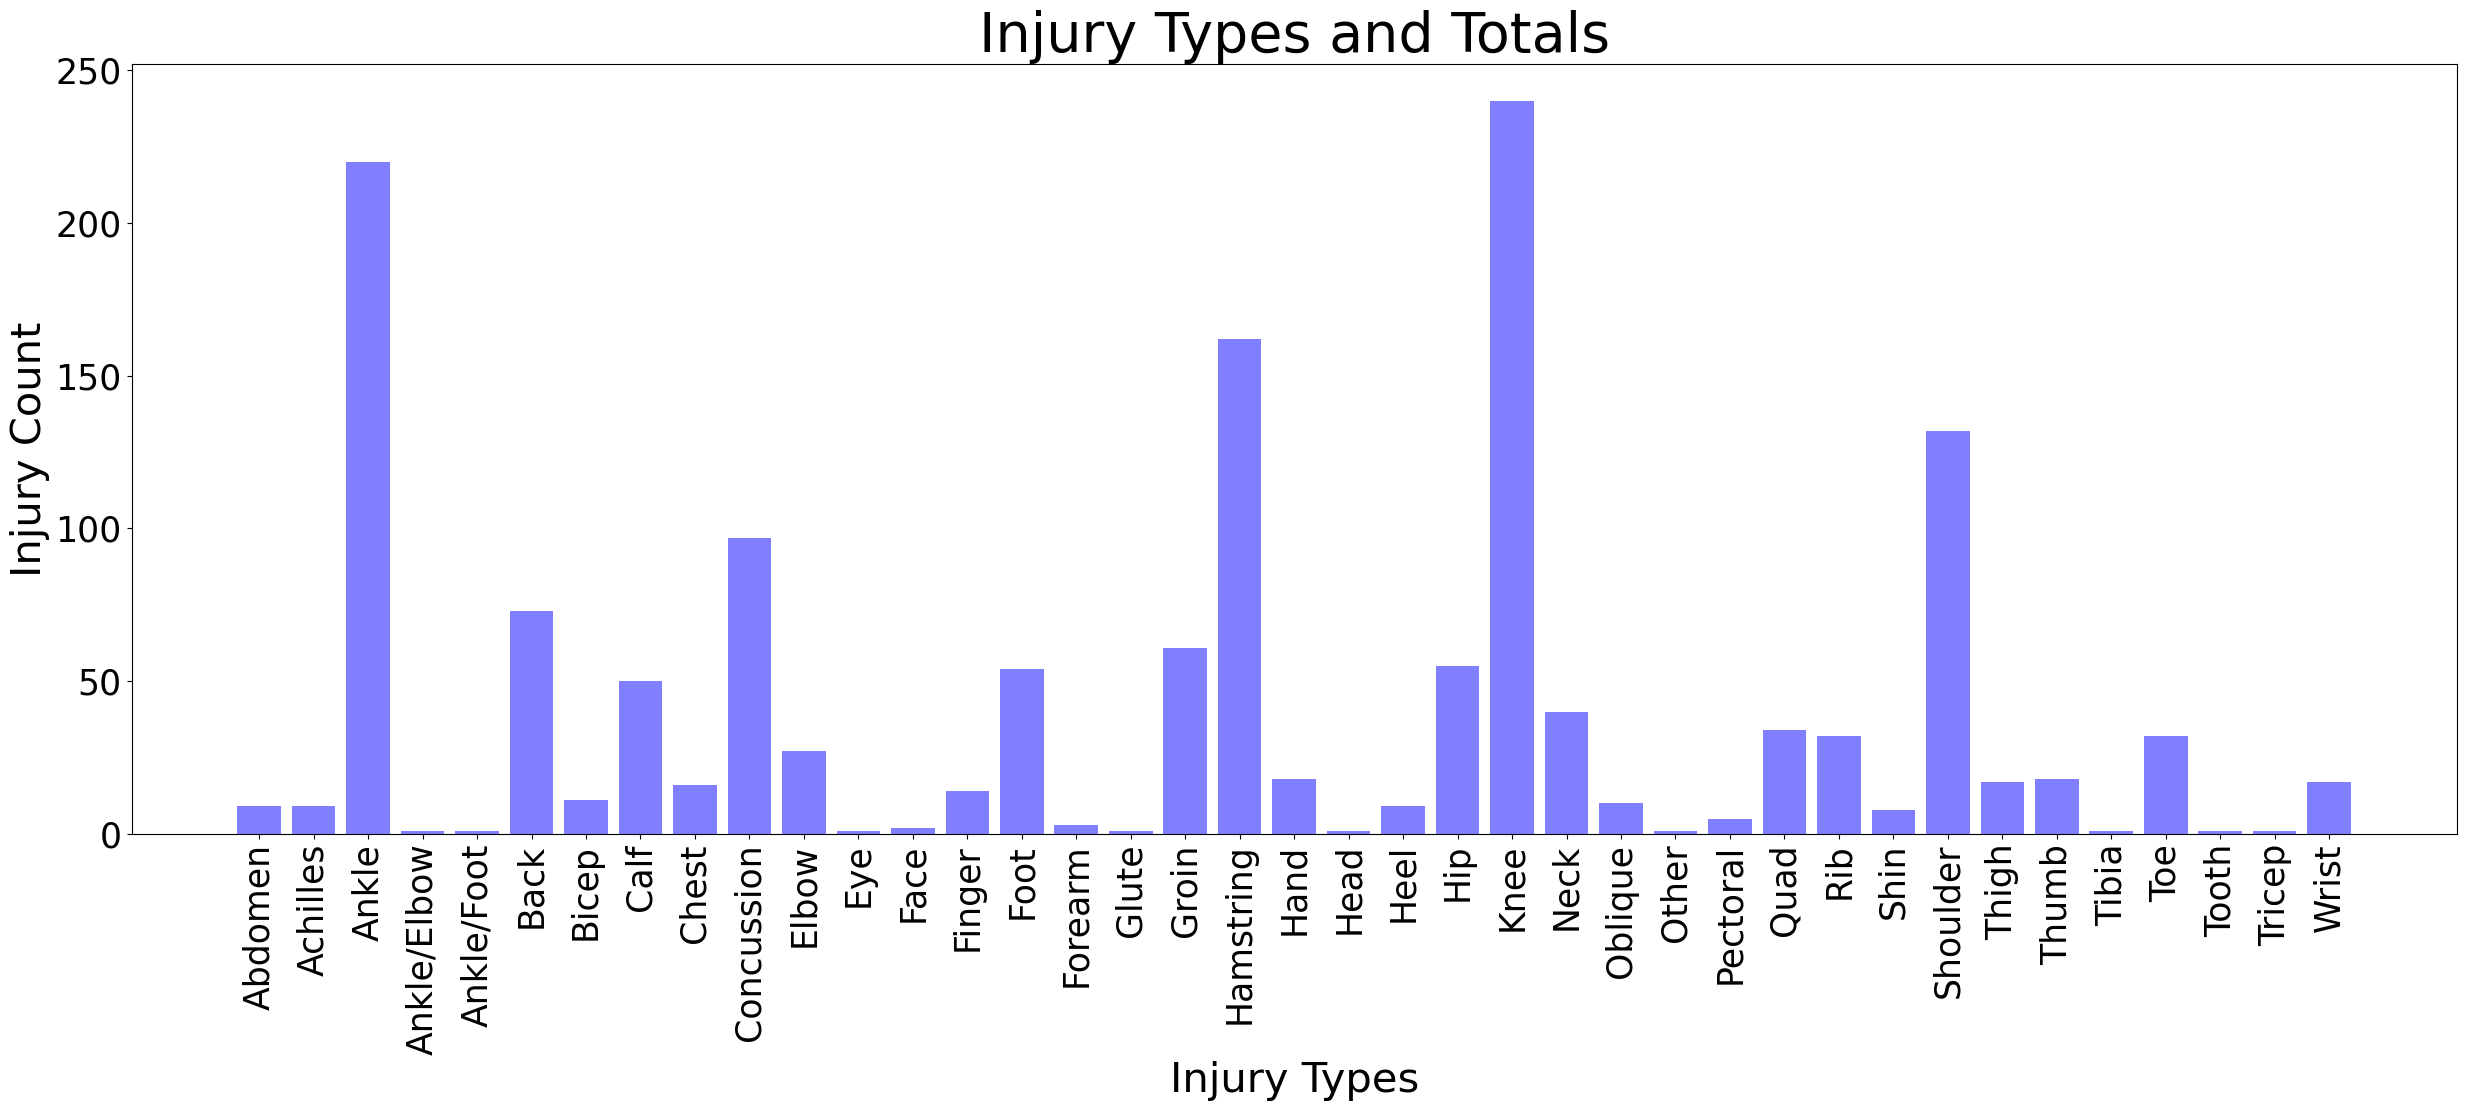

In [159]:
#plot data to get a graph of injury counts by injury type

tick_locations = injury_counts_by_injury.index

plt.figure(figsize=(30,10))
plt.bar(tick_locations, injury_counts_by_injury["Count"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, injury_counts_by_injury["Injury Type"], rotation="vertical", fontsize=25)
plt.yticks(fontsize=25)
plt.title("Injury Types and Totals",fontsize=40)
plt.xlabel("Injury Types",fontsize=30)
plt.ylabel("Injury Count",fontsize=30)
plt.show()

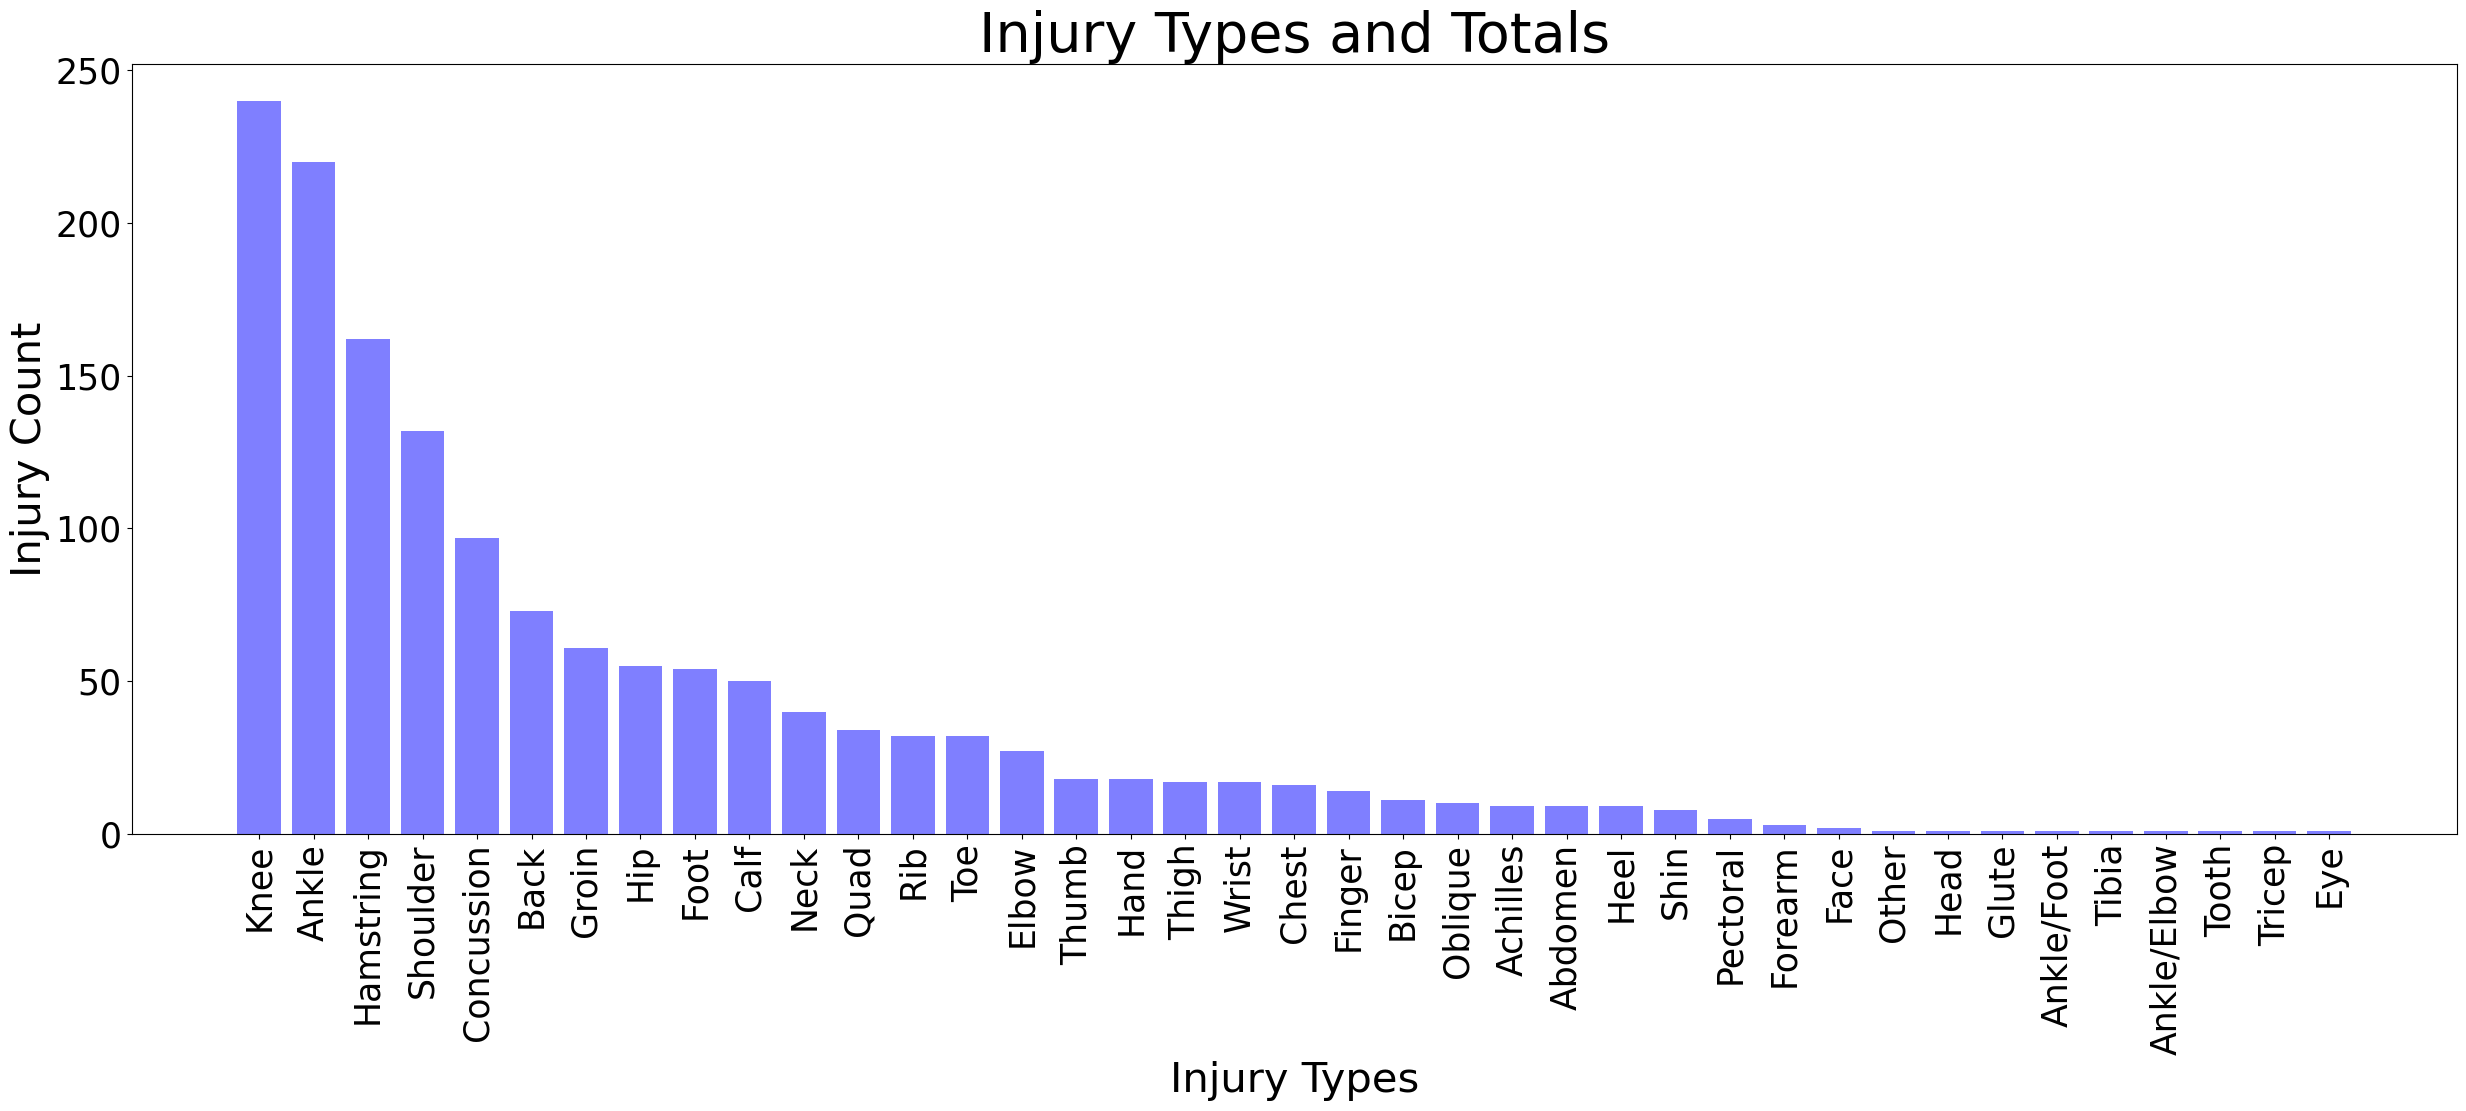

In [160]:
# sort chart values by most to least 


injury_counts_by_injury = injury_counts_by_injury.sort_values(by="Count", ascending=False).reset_index(drop=True)

tick_locations = range(len(injury_counts_by_injury))

plt.figure(figsize=(30,10))
plt.bar(tick_locations, injury_counts_by_injury["Count"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, injury_counts_by_injury["Injury Type"], rotation="vertical", fontsize=25)
plt.yticks(fontsize=25)
plt.title("Injury Types and Totals", fontsize=40)
plt.xlabel("Injury Types", fontsize=30)
plt.ylabel("Injury Count", fontsize=30)
plt.show()

In [162]:
# generate injury counts by position to see which positions make up what injuries and how many if each injury type

injury_counts_by_position = injury_updated_df.groupby(['Position', 'Injury Type'])['Player'].nunique()
injury_counts_by_position = injury_counts_by_position.reset_index(name='Count')

injury_counts_by_position.head()

,Position,Injury Type,Count
0,C,Ankle,3
1,C,Ankle/Foot,1
2,C,Back,1
3,C,Chest,1
4,C,Concussion,1


In [165]:
# generate injury counts by position to see which positions make up the most injuries overall 

total_injuries_by_position = injury_counts_by_position.groupby('Position')['Count'].sum().reset_index(name='Total Injuries')
total_injuries_by_position.head()

,Position,Total Injuries
0,C,24
1,CB,179
2,DB,40
3,DE,59
4,DL,56


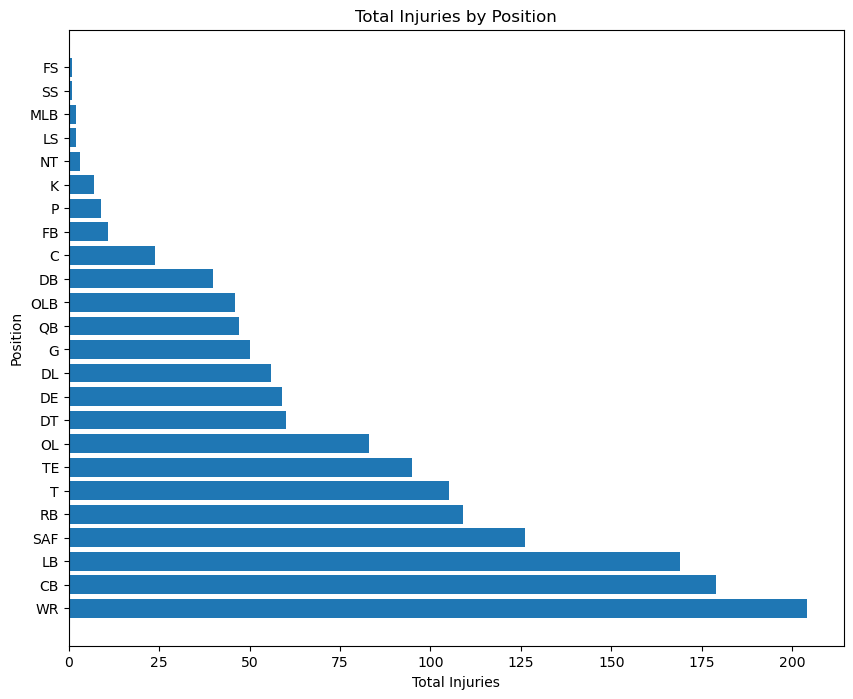

In [167]:
# create a visualization of the data just generated to view in graph form

total_injuries_by_position = total_injuries_by_position.sort_values(by='Total Injuries', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(total_injuries_by_position['Position'], total_injuries_by_position['Total Injuries'])
plt.title("Total Injuries by Position")
plt.xlabel("Total Injuries")
plt.ylabel("Position")
plt.show()

In [169]:
# break down wide receiver injuries specifically

wr_injuries = injury_counts_by_position[injury_counts_by_position['Position'] == 'WR']
wr_injuries.head()

,Position,Injury Type,Count
333,WR,Abdomen,2
334,WR,Achilles,1
335,WR,Ankle,27
336,WR,Back,8
337,WR,Calf,1


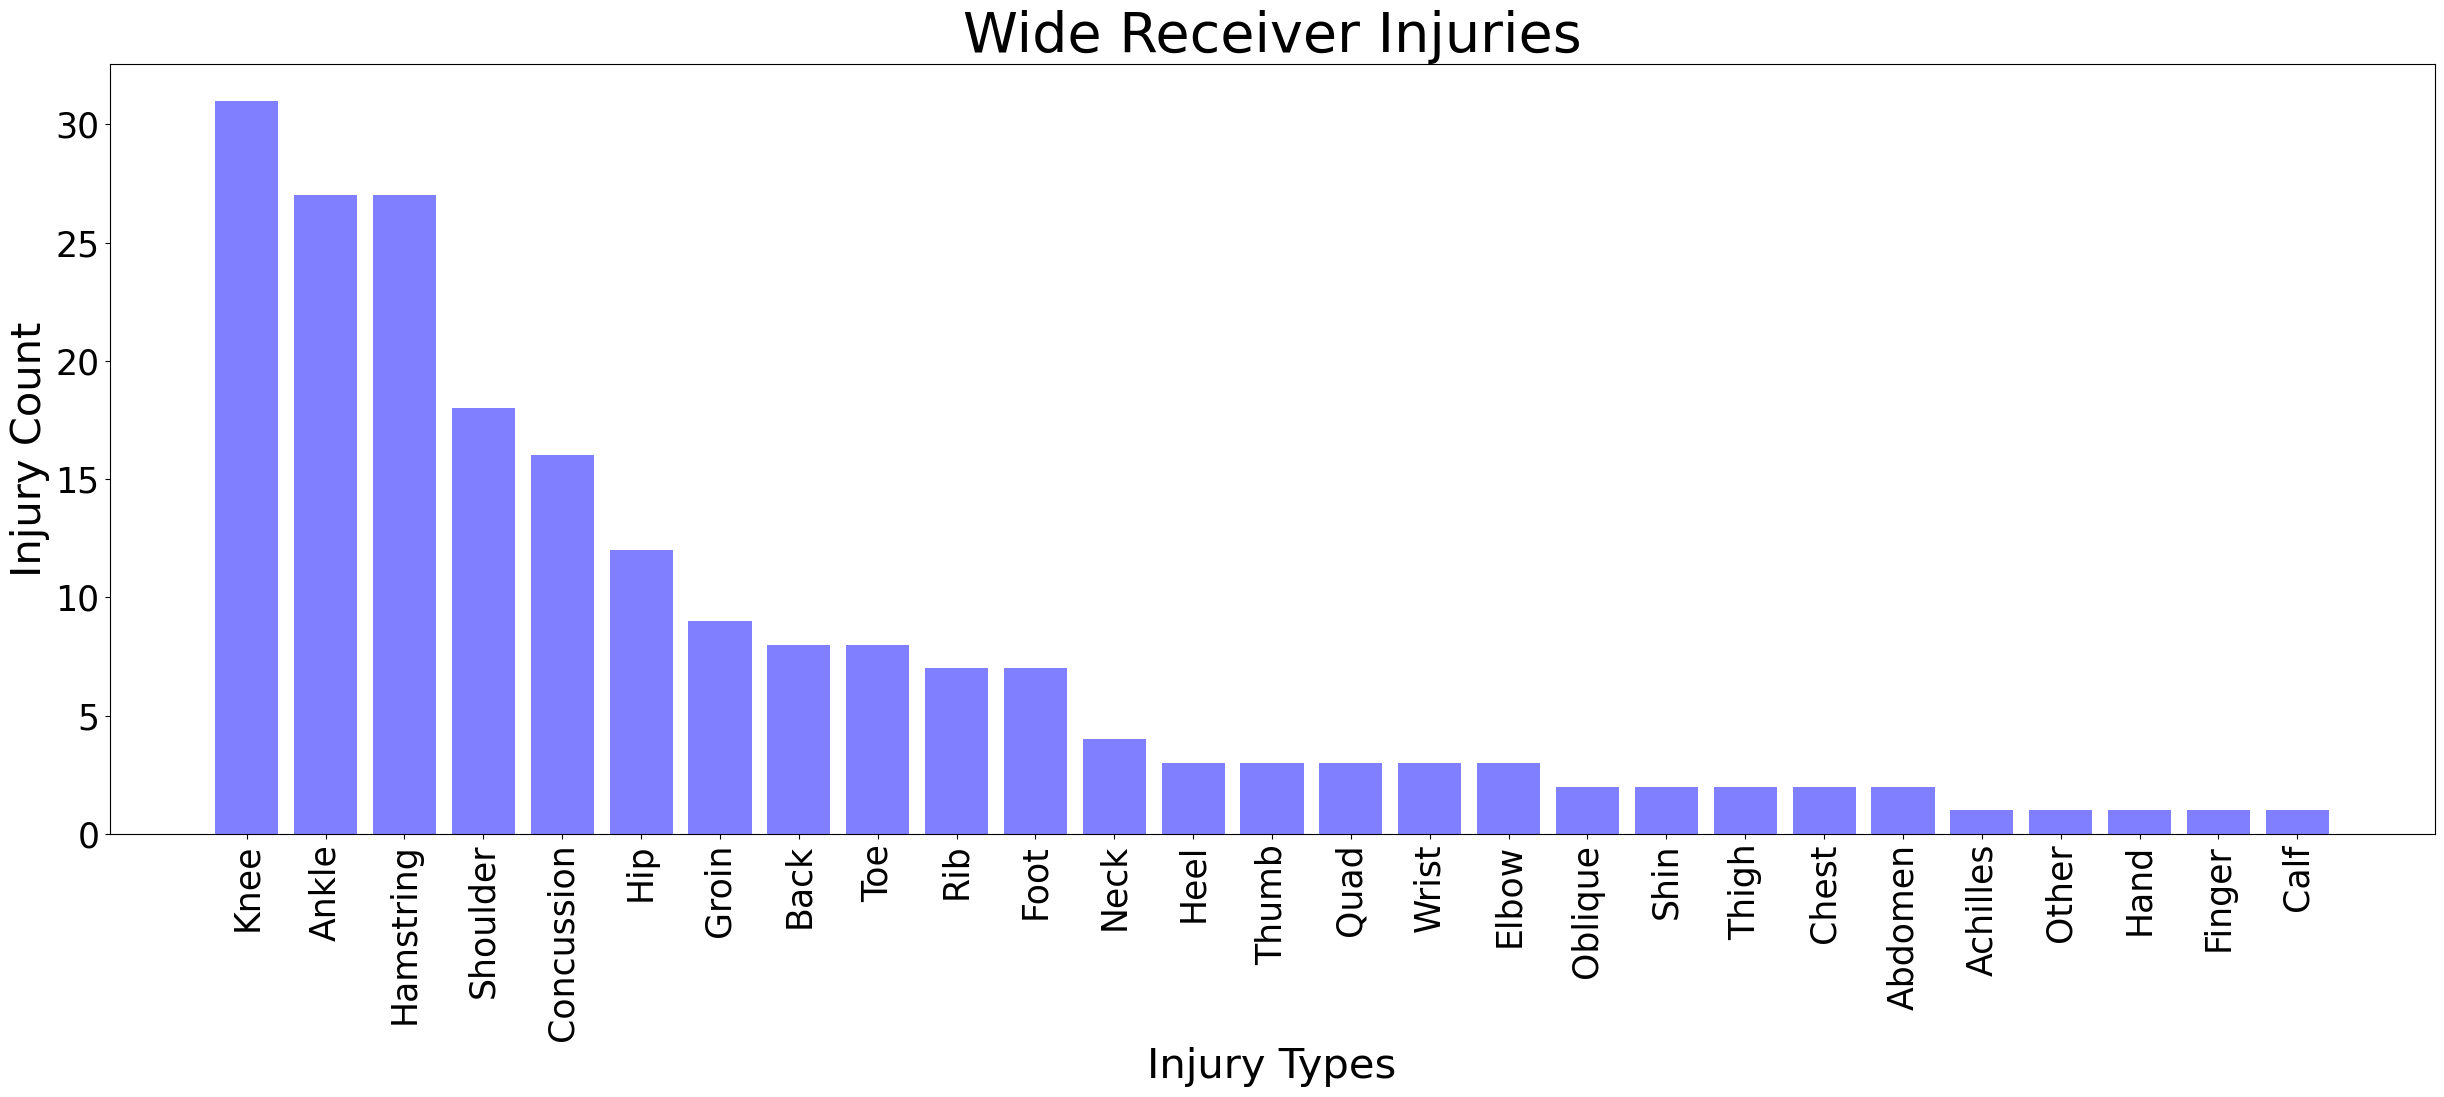

In [171]:
# visualize WR injuries

wr_injuries = wr_injuries.sort_values(by="Count", ascending=False).reset_index(drop=True)

tick_locations = range(len(wr_injuries))

plt.figure(figsize=(30,10))
plt.bar(tick_locations, wr_injuries["Count"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, wr_injuries["Injury Type"], rotation="vertical", fontsize=25)
plt.yticks(fontsize=25)
plt.title("Wide Receiver Injuries", fontsize=40)
plt.xlabel("Injury Types", fontsize=30)
plt.ylabel("Injury Count", fontsize=30)
plt.show()